<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install nltk
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.4 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from collections import Counter
import re

In [10]:
# Descargar recursos de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# Subir archivo PDF
from google.colab import files
uploaded = files.upload()



Saving Farmacologia General.pdf to Farmacologia General.pdf


In [ ]:
pdf_file = list(uploaded.keys())[0]
reader = PdfReader(pdf_file)

In [5]:
text = ""
for page in reader.pages:
    text += page.extract_text()

In [11]:

text = text.lower() #minusculas
text = re.sub(r'[^a-zA-Z\s]', '', text) #eliminar carecteres especiales y num
tokens = word_tokenize(text) #Tokenización: dividir el texto en unidades más pequeñas (tokens).

stop_words = set(stopwords.words('spanish')) #Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (stopwords).
filtered_tokens = [word for word in tokens if word not in stop_words]


In [14]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Lematización
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Contar frecuencia de palabras
word_counts_stem = Counter(stemmed_tokens)
word_counts_lemma = Counter(lemmatized_tokens)

In [15]:
# Mostrar las 20 palabras más frecuentes (Stemming)
print("Frecuencia de palabras (Stemming):")
print(word_counts_stem.most_common(20))

# Mostrar las 10 palabras más frecuentes (Lematización)
print("\nFrecuencia de palabras (Lematización):")
print(word_counts_lemma.most_common(20))


Frecuencia de palabras (Stemming):
[('n', 2911), ('receptor', 596), ('efecto', 527), ('s', 519), ('medicamento', 496), ('m', 443), ('frmaco', 391), ('pued', 351), ('f', 336), ('tratamiento', 320), ('ser', 319), ('rmaco', 298), ('pacient', 281), ('pueden', 277), ('fig', 242), ('dosi', 242), ('ejemplo', 241), ('nico', 236), ('forma', 233), ('ms', 231)]

Frecuencia de palabras (Lematización):
[('n', 2911), ('m', 674), ('s', 536), ('receptores', 480), ('puede', 351), ('f', 338), ('ser', 319), ('medicamentos', 298), ('tratamiento', 288), ('efectos', 286), ('pueden', 277), ('fig', 242), ('frmacos', 242), ('dosis', 242), ('efecto', 241), ('c', 205), ('si', 199), ('medicamento', 198), ('rmacos', 196), ('ejemplo', 192)]


In [18]:
filtered_stemmed_tokens = [word for word in stemmed_tokens if len(word) > 3]
filtered_lemmatized_tokens = [word for word in lemmatized_tokens if len(word) > 3]

# Contar frecuencia de palabras con más de 3 letras
word_counts_stem_filtered = Counter(filtered_stemmed_tokens)
word_counts_lemma_filtered = Counter(filtered_lemmatized_tokens)
# Mostrar las 10 palabras más frecuentes con más de 3 letras (Stemming)
print("Frecuencia de palabras con más de 3 letras (Stemming):")
print(word_counts_stem_filtered.most_common(10))

# Mostrar las 10 palabras más frecuentes con más de 3 letras (Lematización)
print("\nFrecuencia de palabras con más de 3 letras (Lematización):")
print(word_counts_lemma_filtered.most_common(10))

Frecuencia de palabras con más de 3 letras (Stemming):
[('receptor', 596), ('efecto', 527), ('medicamento', 496), ('frmaco', 391), ('pued', 351), ('tratamiento', 320), ('rmaco', 298), ('pacient', 281), ('pueden', 277), ('dosi', 242)]

Frecuencia de palabras con más de 3 letras (Lematización):
[('receptores', 480), ('puede', 351), ('medicamentos', 298), ('tratamiento', 288), ('efectos', 286), ('pueden', 277), ('frmacos', 242), ('dosis', 242), ('efecto', 241), ('medicamento', 198)]


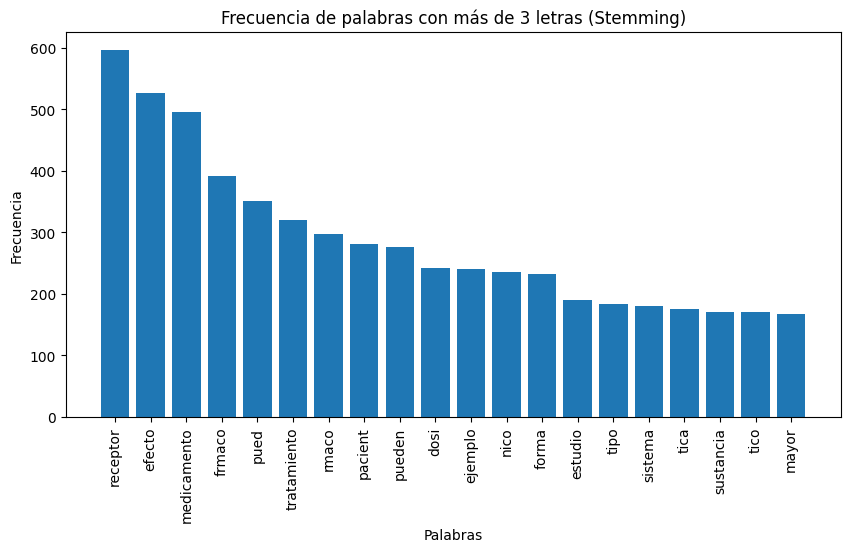

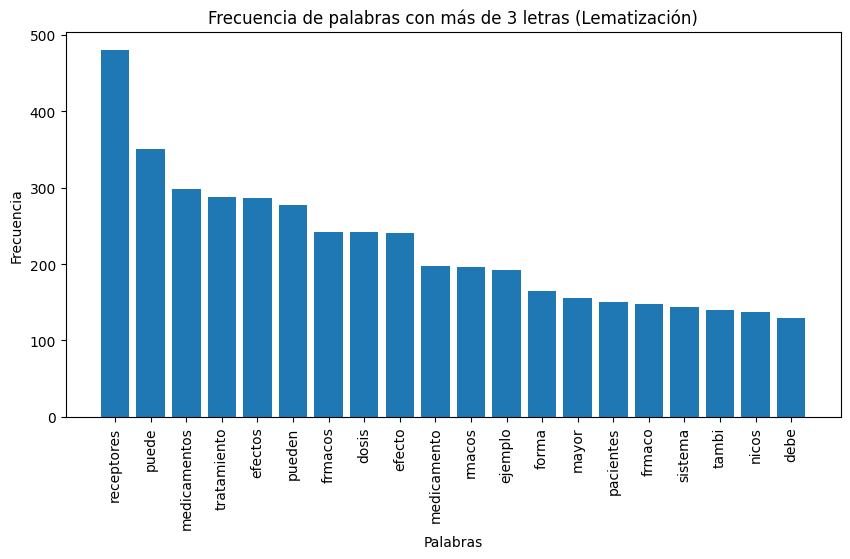

In [21]:

# Graficar las palabras más frecuentes con más de 3 letras
def plot_word_frequency_filtered(word_counts, title):
    words, counts = zip(*word_counts.most_common(20))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.show()

# Graficar frecuencia para Stemming (Palabras con más de 3 letras)
plot_word_frequency_filtered(word_counts_stem_filtered, "Frecuencia de palabras con más de 3 letras (Stemming)")

# Graficar frecuencia para Lematización (Palabras con más de 3 letras)
plot_word_frequency_filtered(word_counts_lemma_filtered, "Frecuencia de palabras con más de 3 letras (Lematización)")

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud


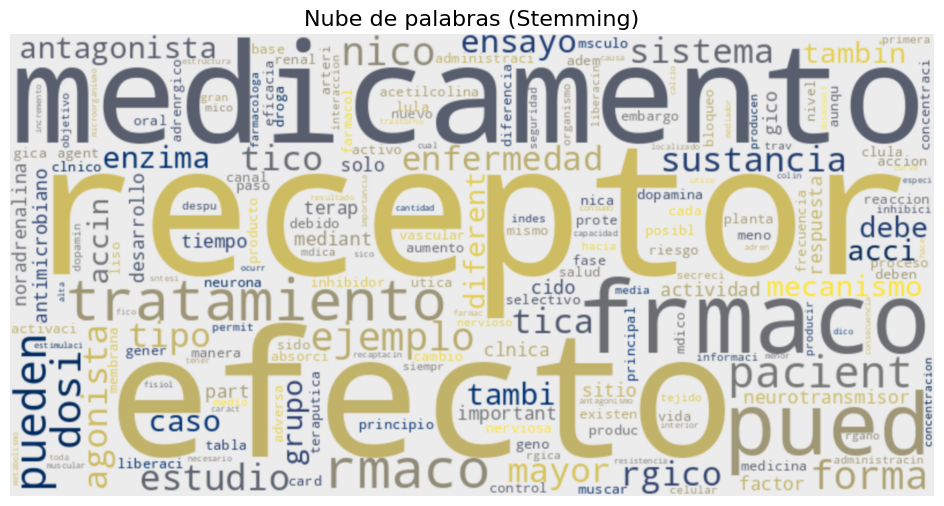

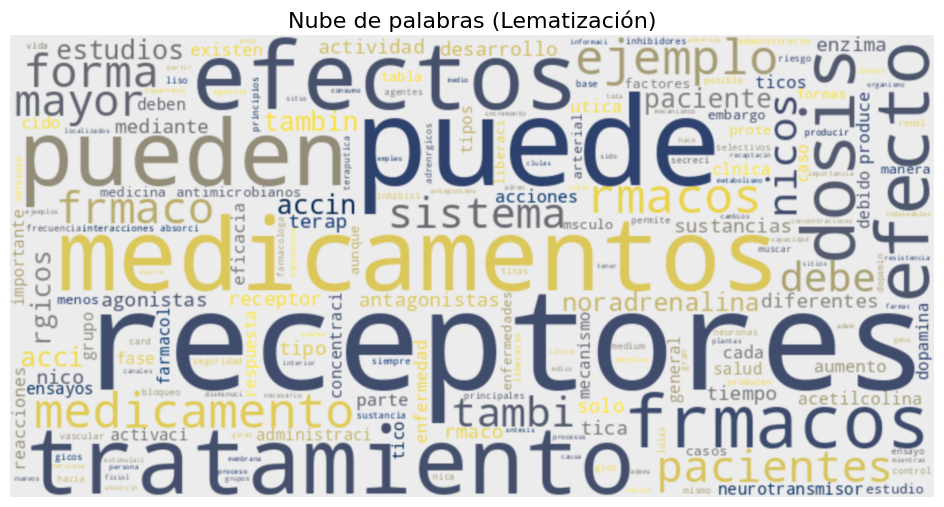

In [43]:

def generate_wordcloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='#ECECEC', colormap='cividis').generate_from_frequencies(word_counts)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bicubic')
    plt.title(title, fontsize=16)
    plt.axis('off')  # Ocultar ejes
    plt.show()

# Generar nube de palabras para Stemming (Palabras con más de 3 letras)
generate_wordcloud(word_counts_stem_filtered, "Nube de palabras (Stemming)")

# Generar nube de palabras para Lematización (Palabras con más de 3 letras)
generate_wordcloud(word_counts_lemma_filtered, "Nube de palabras (Lematización)")
